In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy
import copy
# %matplotlib inline
# %matplotlib notebook
# %matplotlib widget


In [7]:
df = pd.read_csv('enviro_data.csv')
df['BME680 Temperature [degC]'] = df['BME680 Temperature [degC]'] - 10
df['TMP102 Temperature [degC]'] = df['TMP102 Temperature [degC]'] - 8
df = df.iloc[50:, :]

In [97]:
df

,Date,Time,BME680 Temperature [degC],BME680 Pressure [Pa],BME680 Humidity [%],BME680 VOC,TMP102 Temperature [degC],TSL2591 Lux [Lux],TSL2591 Full,TSL2591 IR
50,05/10/2020,01:56:07,23.578286,101092.885714,22.605029,3.776738e+05,23.466964,0.597040,0.914286,0.028571
51,05/10/2020,01:58:06,23.596000,101092.771429,22.586814,3.771750e+05,23.525893,0.503589,0.885714,0.114286
52,05/10/2020,02:00:06,23.450000,101089.671429,22.703829,3.778131e+05,23.307143,0.540600,0.885714,0.071429
53,05/10/2020,02:02:06,23.503286,101087.914286,22.626343,3.774445e+05,23.349107,0.539823,0.957143,0.128571
54,05/10/2020,02:04:06,23.468714,101087.942857,22.631100,3.772603e+05,23.334821,0.604131,0.942857,0.042857
...,...,...,...,...,...,...,...,...,...,...
49413,12/12/2020,14:44:06,24.096000,101529.957143,18.405229,2.179367e+06,24.003571,76.019726,164.414286,32.085714
49414,12/12/2020,14:46:06,24.134571,101529.285714,18.483586,2.177376e+06,23.775000,65.805349,141.942857,27.542857
49415,12/12/2020,14:48:07,24.173714,101529.371429,18.518586,2.171836e+06,23.764286,71.848023,155.257143,30.242857
49416,12/12/2020,14:50:06,24.402714,101533.000000,18.407114,2.170897e+06,24.225000,90.453989,196.371429,38.628571


<ipython-input-122-8766e88c3f40>:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 2, i + 1)


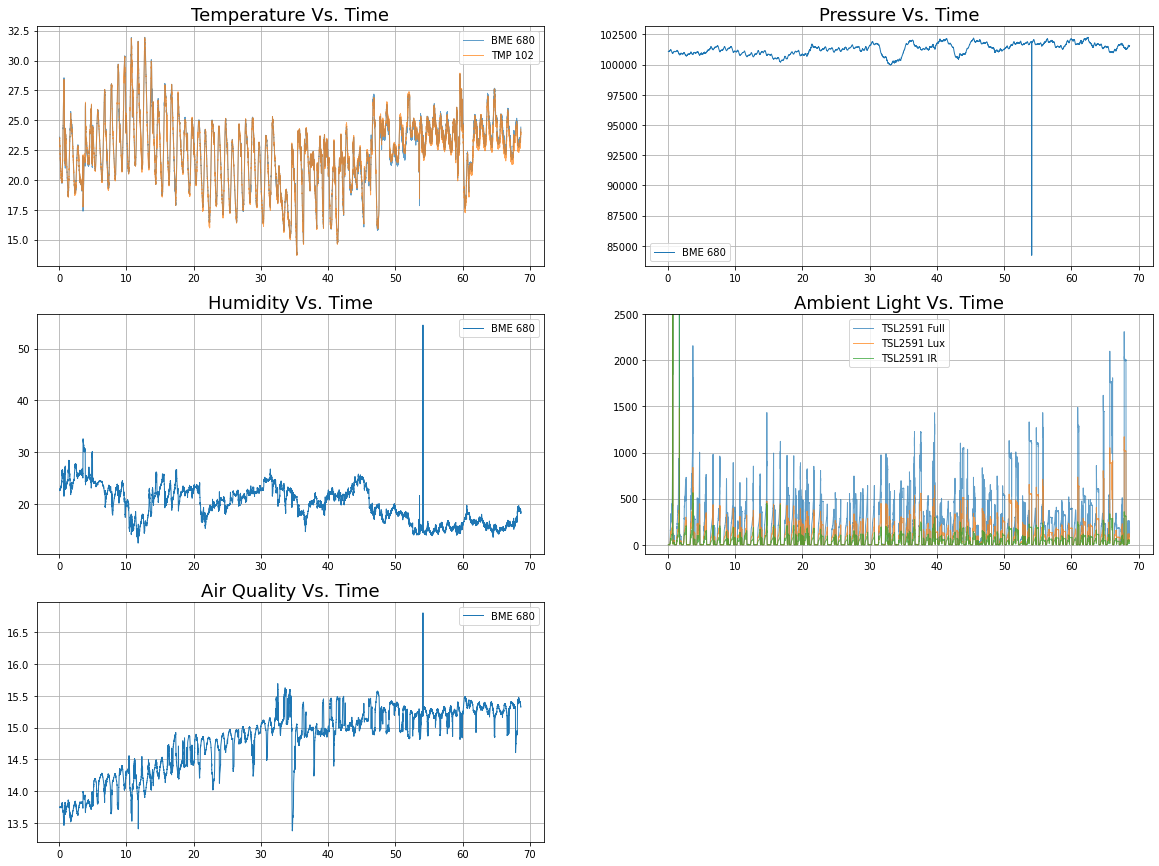

In [122]:
plt.close('all')

xmin = 20
xmax = 25

df_temp = copy.deepcopy(df)
time_days = df.index / (30 * 24)
idx_min = np.argmin(np.abs(time_days - xmin))
idx_max = np.argmin(np.abs(time_days - xmax))
# df_temp = df_temp.iloc[idx_min:idx_max, :]

plt.figure(figsize=(20,15))

time_days = df_temp.index / (30 * 24)
bme_temp = df_temp['BME680 Temperature [degC]'].values
bme_pres = df_temp['BME680 Pressure [Pa]'].values
bme_hum = df_temp['BME680 Humidity [%]'].values
bme_voc = df_temp['BME680 VOC'].values
tmp_temp = df_temp['TMP102 Temperature [degC]'].values
tsl_lux = df_temp['TSL2591 Lux [Lux]'].values
tsl_full = df_temp['TSL2591 Full'].values
tsl_ir = df_temp['TSL2591 IR'].values

bme_voc_comp = np.log(bme_voc) + 0.04 * bme_hum

# For start time
time_days = time_days - time_days[0] + 0.081

plt.subplot(3, 2, 1)
plt.plot(time_days, bme_temp, markersize=0, linewidth=1, alpha=0.7, label='BME 680')
plt.plot(time_days, tmp_temp, markersize=0, linewidth=1, alpha=0.7, label='TMP 102')
plt.title('Temperature Vs. Time', fontsize=18)
plt.legend(loc='best')

plt.subplot(3, 2, 2)
plt.plot(time_days, bme_pres, markersize=0, linewidth=1, label='BME 680')
plt.title('Pressure Vs. Time', fontsize=18)
plt.legend(loc='best')

plt.subplot(3, 2, 3)
plt.plot(time_days, bme_hum, markersize=0, linewidth=1, label='BME 680')
plt.title('Humidity Vs. Time', fontsize=18)
plt.legend(loc='best')

plt.subplot(3, 2, 4)
plt.plot(time_days, tsl_full, markersize=0, linewidth=1, alpha=0.7, label='TSL2591 Full')
plt.plot(time_days, tsl_lux, markersize=0, linewidth=1, alpha=0.7, label='TSL2591 Lux')
plt.plot(time_days, tsl_ir, markersize=0, linewidth=1, alpha=0.7, label='TSL2591 IR')
plt.title('Ambient Light Vs. Time', fontsize=18)
plt.ylim([-100, 2500])
plt.ylim([-100, 2500])
plt.legend(loc='best')

plt.subplot(3, 2, 5)
plt.plot(time_days, bme_voc_comp, markersize=0, linewidth=1, label='BME 680')
plt.title('Air Quality Vs. Time', fontsize=18)
plt.legend(loc='best')


for i in range(5):
    plt.subplot(3, 2, i + 1)
    plt.grid(True)

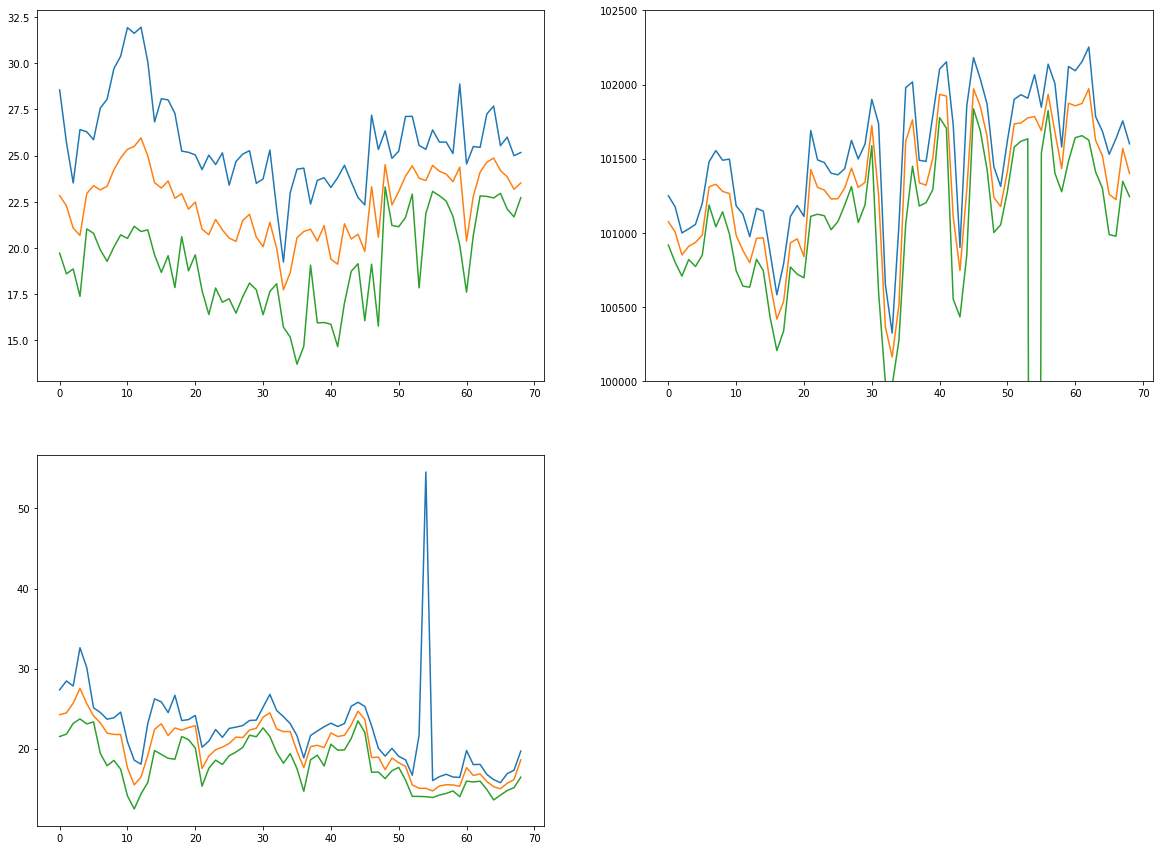

In [128]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.plot(max_temp)
plt.plot(ave_temp)
plt.plot(min_temp)

plt.subplot(2,2,2)
plt.plot(max_pressure)
plt.plot(ave_pressure)
plt.plot(min_pressure)
plt.ylim([100000, 102500])

plt.subplot(2,2,3)
plt.plot(max_humidity)
plt.plot(ave_humidity)
plt.plot(min_humidity)

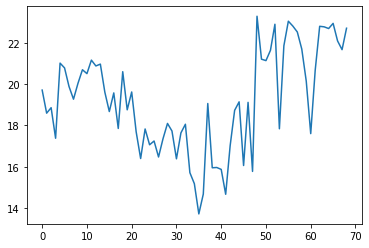

In [117]:
max_temp

array([], dtype=float64)

No handles with labels found to put in legend.


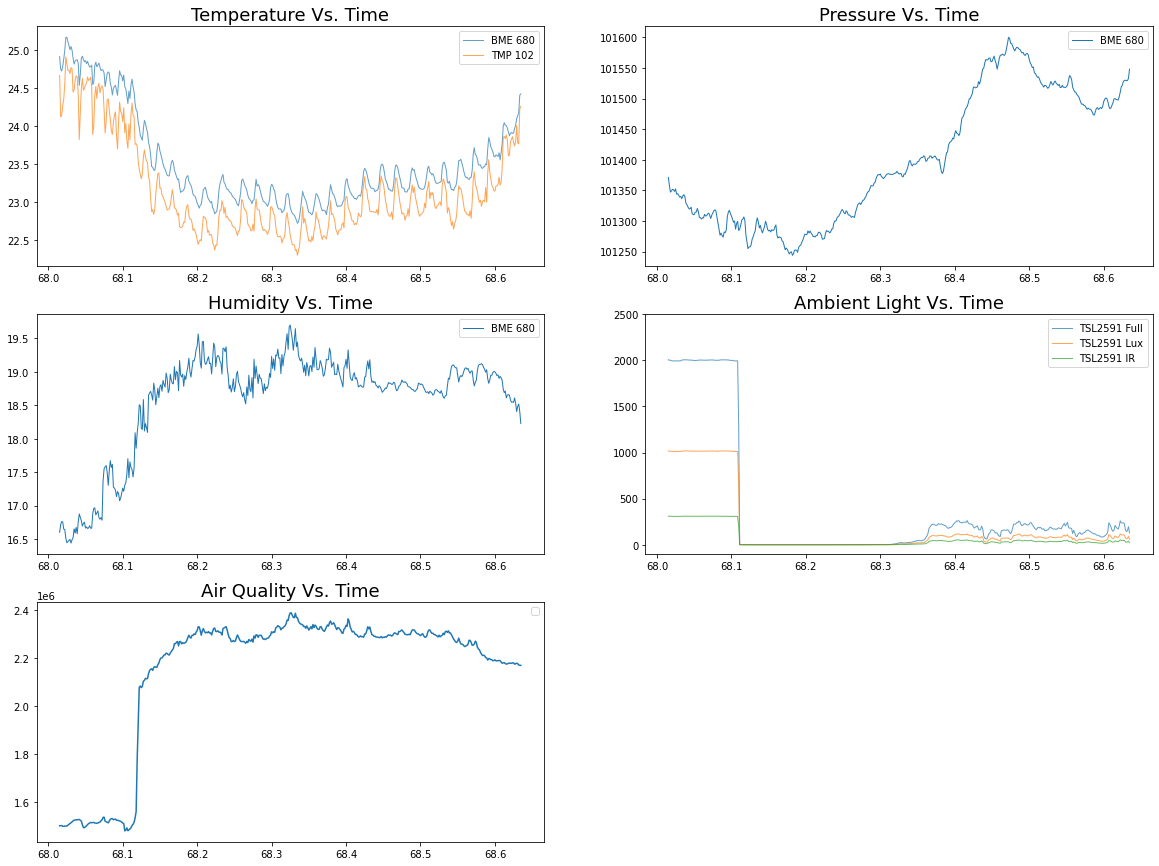

In [118]:
_, unique_idxs = np.unique(df['Date'], return_index=True)
unique_idxs = np.sort(unique_idxs)
unique_dates = df['Date'].values[unique_idxs]

max_temp = []
ave_temp = []
min_temp = []

max_pressure = []
ave_pressure = []
min_pressure = []

max_humidity = []
ave_humidity = []
min_humidity = []

plt.figure(figsize=(20,15))

for unique_date in unique_dates:
    
    df_temp = df[df['Date'] == unique_date]
    
    time_days = df_temp.index / (30 * 24)
    bme_temp = df_temp['BME680 Temperature [degC]'].values
    bme_pres = df_temp['BME680 Pressure [Pa]'].values
    bme_hum = df_temp['BME680 Humidity [%]'].values
    bme_voc = df_temp['BME680 VOC'].values
    tmp_temp = df_temp['TMP102 Temperature [degC]'].values
    tsl_lux = df_temp['TSL2591 Lux [Lux]'].values
    tsl_full = df_temp['TSL2591 Full'].values
    tsl_ir = df_temp['TSL2591 IR'].values
    
    max_temp += [np.max(bme_temp)]
    ave_temp += [np.mean(bme_temp)]
    min_temp += [np.min(bme_temp)]

    max_pressure += [np.max(bme_pres)]
    ave_pressure += [np.mean(bme_pres)]
    min_pressure += [np.min(bme_pres)]

    max_humidity += [np.max(bme_hum)]
    ave_humidity += [np.mean(bme_hum)]
    min_humidity += [np.min(bme_hum)]
    
time_days = df_temp.index / (30 * 24)
    
plt.subplot(3, 2, 1)
plt.plot(time_days, bme_temp, markersize=0, linewidth=1, alpha=0.7, label='BME 680')
plt.plot(time_days, tmp_temp, markersize=0, linewidth=1, alpha=0.7, label='TMP 102')
plt.title('Temperature Vs. Time', fontsize=18)
plt.legend(loc='best')

plt.subplot(3, 2, 2)
plt.plot(time_days, bme_pres, markersize=0, linewidth=1, label='BME 680')
plt.title('Pressure Vs. Time', fontsize=18)
plt.legend(loc='best')

plt.subplot(3, 2, 3)
plt.plot(time_days, bme_hum, markersize=0, linewidth=1, label='BME 680')
plt.title('Humidity Vs. Time', fontsize=18)
plt.legend(loc='best')

plt.subplot(3, 2, 4)
plt.plot(time_days, tsl_full, markersize=0, linewidth=1, alpha=0.7, label='TSL2591 Full')
plt.plot(time_days, tsl_lux, markersize=0, linewidth=1, alpha=0.7, label='TSL2591 Lux')
plt.plot(time_days, tsl_ir, markersize=0, linewidth=1, alpha=0.7, label='TSL2591 IR')
plt.title('Ambient Light Vs. Time', fontsize=18)
plt.ylim([-100, 2500])
plt.legend(loc='best')

plt.subplot(3, 2, 5)
plt.plot(time_days, bme_voc)
plt.title('Air Quality Vs. Time', fontsize=18)
plt.legend(loc='best')

    
    
    

<ipython-input-12-fe6e35550f73>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,1)
<ipython-input-12-fe6e35550f73>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,2)
<ipython-input-12-fe6e35550f73>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

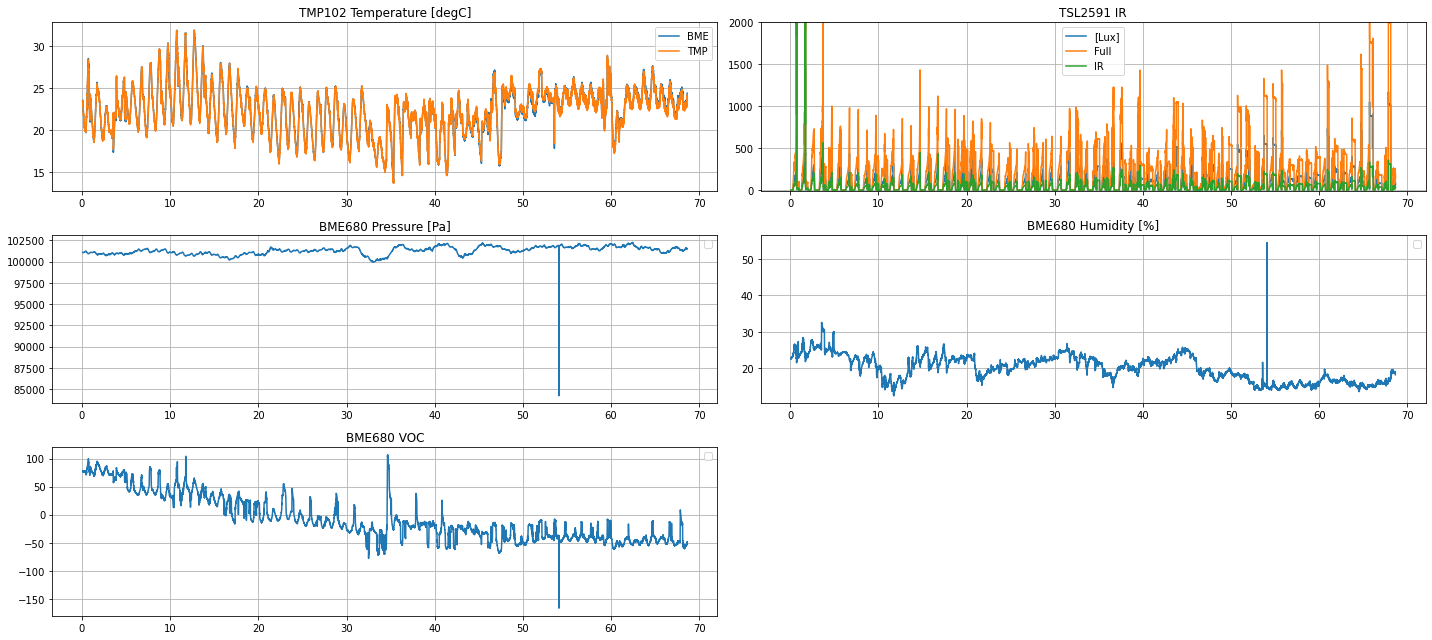

In [12]:
plt.close('all')

plt.figure(figsize=(20,9))

col_idx = 2

for col in list(df)[2:]:
    
    x = df[list(df)[1]]
    x = df.index
    y = df[col]
    
    if col == 'BME680 Temperature [degC]':
#         plt.figure(figsize=(10,3), num=0)
        plt.subplot(3,2,1)
        label = 'BME'
    elif 'Temperature' in col:
#         plt.figure(figsize=(10,3), num=0)
        plt.subplot(3,2,1)
        label = 'TMP'
    elif 'TSL' in col:
        label = col.split(' ')[-1]
        plt.subplot(3,2,2)
    else:
#         plt.figure(figsize=(10,3))
        col_idx = col_idx + 1
        plt.subplot(3,2,col_idx)
        label=None
     
    if 'Humidity' in col:
        h = y.values
    
    if 'VOC' in col:
        g = y
        k = 2
        y = np.log(y) + 0.04 * h
        
        y_sensor = [13.46, 14.55]
        y_outdoors = [100, 13]
        
        fit = np.polyfit(y_sensor, y_outdoors, 1)
        y = np.polyval(fit, y)
        
        k = 0.25
        h0 = 25
        g0 = 300000
        
        iaq_h = [h_temp / h0 * k * 100  if h_temp > h0 else (100 - h_temp) / (100 - h0) * k * 100 for h_temp in h]

        iaq_g = g / g0 * (100 - k * 100)
#         y = iaq_h + iaq_g

    
    # Convert from minutes to days
    x = x / (30 * 24)
    
    plt.plot(x, y, markersize=0, markeredgecolor='black', marker='o', label=label)
    plt.grid(True)
    plt.title(col)
    if len(plt.xticks()[0]) == len(x):
        plt.xticks(plt.xticks()[0][::16], rotation=45)
        
    if 'TSL' in col:
        plt.ylim([-10, 2000])
        
plt.tight_layout()

for i in range(5):
    plt.subplot(3,2,i+1)
    plt.legend(loc='best')


In [17]:
gas

array([377673.83948948, 377175.02775534, 377813.05303421, ...,
       654999.84951367, 652159.84029072, 648072.9961924 ])

In [46]:
plt.close('all')

plt.figure(figsize=(10,6))

gas = df['BME680 VOC'].values
humidity = df['BME680 Humidity [%]'].values

plt.subplot(2,1,1)

for k in [0.01, 0.1, 1, 2, 5]:

    y = np.log(gas) + 0.04 * k * humidity
    plt.plot(y, markersize=0, linewidth=1, label=k)

plt.title('Gas [IAQ]')
plt.legend(loc='upper left')


plt.subplot(2,1,2)
plt.plot(humidity, markersize=0, linewidth=1, label='humidity')
plt.legend(loc='best')

gas = np.log(gas) + 0.04 * 1 * humidity

plt.sca(plt.gca().twinx())
plt.plot(gas, markersize=0, linewidth=1, label='gas', color='C1')
plt.title('Humidity [%rh]')
plt.legend(loc='best')

plt.tight_layout()



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [49]:
list(df)

['Date',
 'Time',
 'BME680 Temperature [degC]',
 'BME680 Pressure [Pa]',
 'BME680 Humidity [%]',
 'BME680 VOC',
 'TMP102 Temperature [degC]',
 'TSL2591 Lux [Lux]',
 'TSL2591 Full',
 'TSL2591 IR']

In [124]:
plt.figure(figsize=(10,3))

x = df['BME680 Temperature [degC]'].values
y = df['BME680 Pressure [Pa]'].values

plt.plot(x, y, markersize=3, linewidth=0, markeredgecolor='black', marker='o')
plt.grid(True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
def CropData(x, y, x_start, x_end):
    start_idx = np.argmin(np.abs(x - x_start))
    start_idx = np.argmin(np.abs(x - x_start))